<a href="https://colab.research.google.com/github/arshakRz/GVS-Neuromodulation_Analysis/blob/main/IBI_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import butter, filtfilt, lfilter, iirnotch, resample
from scipy import stats
plt.rcParams['figure.figsize'] = [16, 8]

#FUNCTIONS
def butter_bandpass_filter(data, lowcut, highcut, sRate, order=4):
    nyq = 0.5 * sRate
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandpass')
    y = filtfilt(b, a, data)
    return y

def notch_filter(signal, fs, filter_range=[50, 60]):
    for f0 in filter_range:  # Frequency to be removed from signal (Hz)
        Q = 30.0  # Quality factor
        w0 = f0 / (fs / 2)  # Normalized Frequency
        b, a = iirnotch(w0, Q)
        for i in range(signal.shape[-1]):
            signal[:, i] = lfilter(b, a, signal[:, i])

    return signal

def butter_lowpass_filter(data, cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def resample_frequency(signal, seg_len, new_fs, old_fs):
    """
    Resample the signal to a new frequency and keeping the time fixed
    args:
        signal (np.array): ecg signal
        seg_len (int): length of the signal in seconds
        new_fs (int): frequency after resampling
        old_fs (int): frequency before resampling
    returns:
        resampled signal (np.array)
    """
    if seg_len is None:
        num = int(len(signal) / old_fs * new_fs)
    else:
        num = int(seg_len * new_fs)
    return resample(signal, num=num)

In [ ]:
def plot_windows(loc, sub, standing_inds):

  path = loc + 'BVP.csv'
  df = pd.read_csv(path)
  init_time = int(float(df.columns.values.tolist()[0]))
  fs_bvp = df.values[0]
  bvp = np.squeeze(df.values[1:])
  dt = 1/fs_bvp
  sample_no = bvp.shape[0]
  endtime = sample_no * dt
  t = np.linspace(0, endtime, sample_no)

  path = loc + 'tags.csv'
  df = pd.read_csv(path)
  keys = df.keys()
  tags = np.array(df[keys[0]])
  inds = np.round((tags-init_time)*fs_bvp)
  inds = inds.astype(np.int32)

  path = loc + 'IBI.csv'
  df = pd.read_csv(path)
  IBI_value = np.squeeze(df.values[:, 1])
  IBI_time = np.squeeze(df.values[:, 0])

  fig, ax = plt.subplots()
  count = 0

  for num in standing_inds:
    tag = inds[num]
    tag_time = tag/fs_bvp
    tag_IBI_ind = np.argmin(np.abs(IBI_time-tag_time))
    signal_is_available = 1
    if (tag_IBI_ind-10 > 0) & (tag_IBI_ind+10 < len(IBI_time)):
      start_ind = tag_IBI_ind-10
      end_ind = tag_IBI_ind+10
      if ((np.abs(IBI_time[start_ind]-IBI_time[tag_IBI_ind])>50) | (np.abs(IBI_time[end_ind]-IBI_time[tag_IBI_ind])>50)):
        signal_is_available = 0
    else:
      signal_is_available = 0

    count += 1
    plt.subplot(2, 3, count)

    if count<=3:
      tit = "Sham Trial " + str(count)
    else:
      tit = "GVS Trial " + str(count-3)

    if signal_is_available:
      plt.scatter(IBI_time[(tag_IBI_ind-10):(tag_IBI_ind+10)], IBI_value[(tag_IBI_ind-10):(tag_IBI_ind+10)], color="green", marker="*")
      plt.plot(IBI_time[(tag_IBI_ind-10):(tag_IBI_ind+10)], IBI_value[(tag_IBI_ind-10):(tag_IBI_ind+10)])
      plt.vlines(x = IBI_time[tag_IBI_ind], ymin=min(IBI_value[(tag_IBI_ind-10):(tag_IBI_ind+10)]), ymax=max(IBI_value[(tag_IBI_ind-10):(tag_IBI_ind+10)]), colors = 'red', ls='--')
    else:
      plt.scatter(0,0, color="green", marker="*")
      plt.plot(0, 0)
      plt.vlines(x = 0, ymin = 0, ymax = 0, colors = 'red', ls='--')

    plt.title(tit)
    plt.subplots_adjust(right=0.85)
    fig.legend(["IBI Signal",  "IBI Interpolated Signal", "Tag"], loc = 'right')
  plt.suptitle("OH"+str(sub)+" ")
  plt.show()


<ipython-input-3-c4889f534c06>:42: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, count)


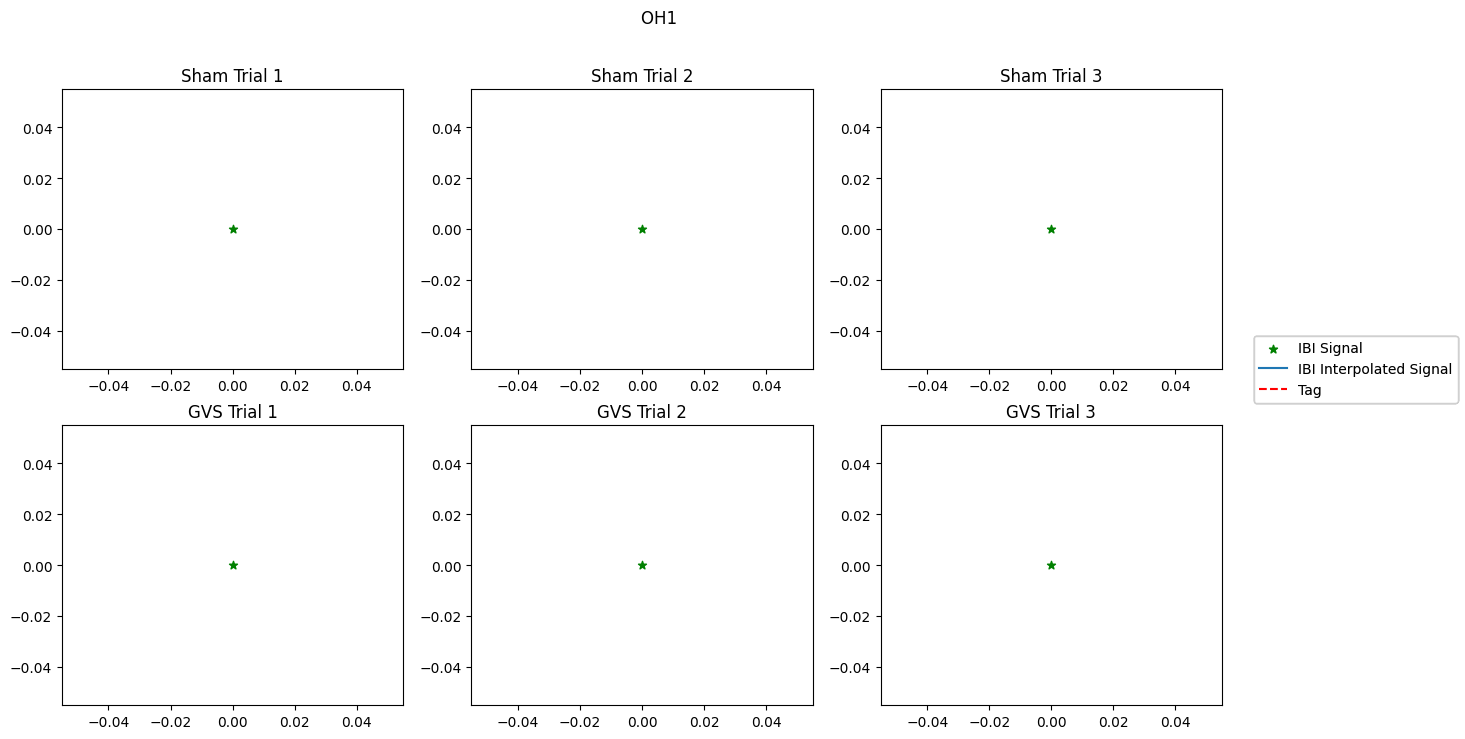

In [ ]:
loc = '/content/drive/MyDrive/DATA_untouched/OH01_April 14 2022_e4 data/'
standing_inds = [3, 7, 12, 21, 28, 33]
plot_windows(loc, 1, standing_inds)

<ipython-input-3-c4889f534c06>:42: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, count)


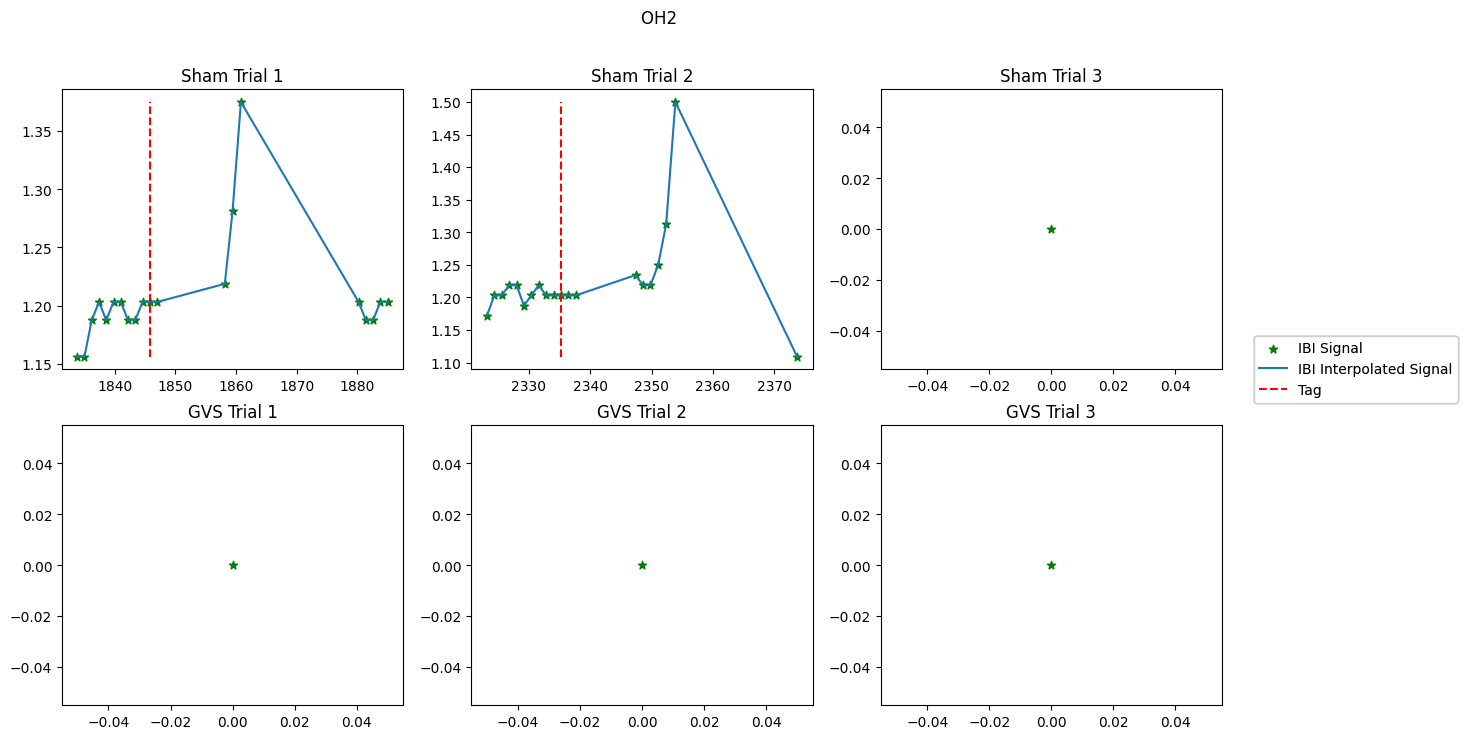

In [ ]:
loc = '/content/drive/MyDrive/DATA_untouched/OH02_April 19 2022_e4 data/'
standing_inds = [4, 9, 14, 22, 27, 32]
offsets_ = plot_windows(loc, 2, standing_inds)

<ipython-input-3-c4889f534c06>:42: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, count)


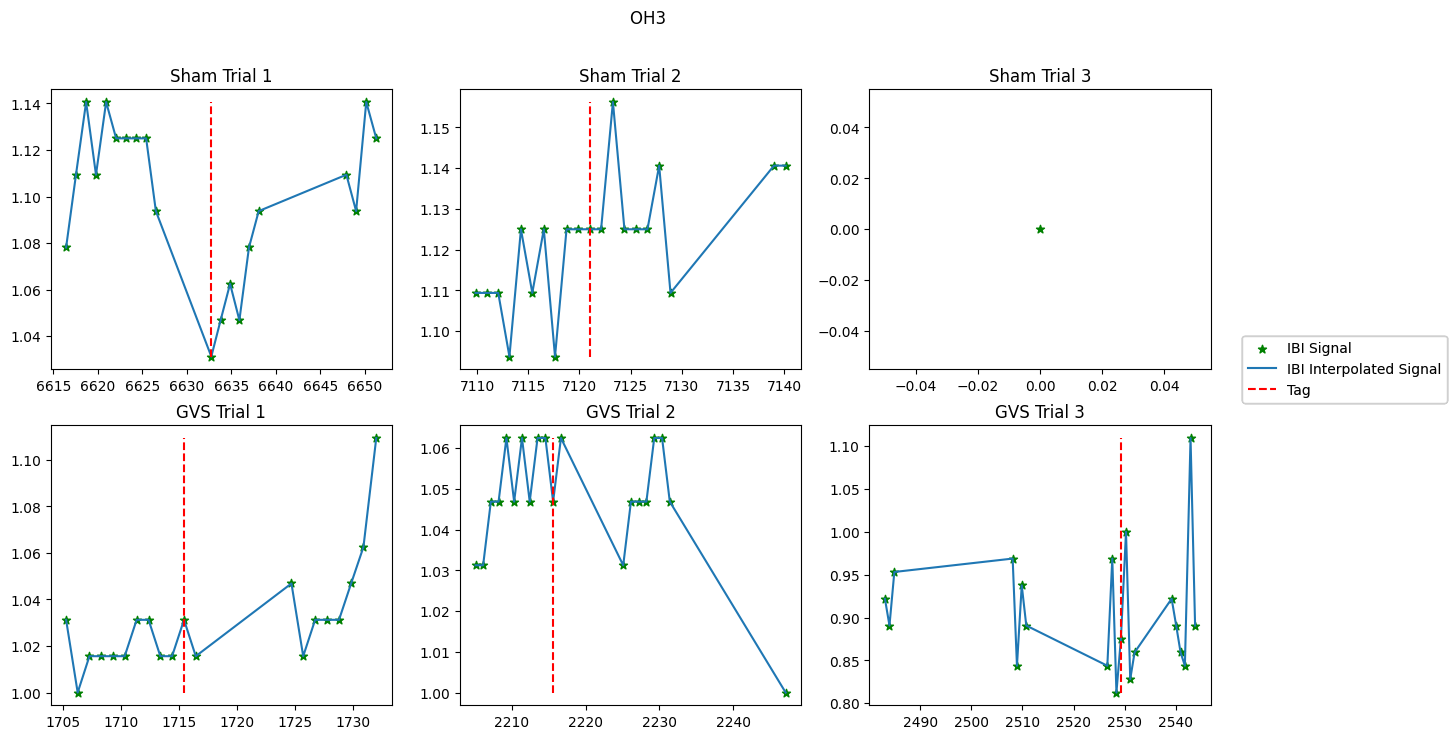

In [ ]:
loc = '/content/drive/MyDrive/DATA_untouched/OH03_April 20 2022_e4 data/'
standing_inds = [25, 30, 35, 7, 12, 16]
offsets_ = plot_windows(loc, 3, standing_inds)

<ipython-input-3-c4889f534c06>:42: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, count)


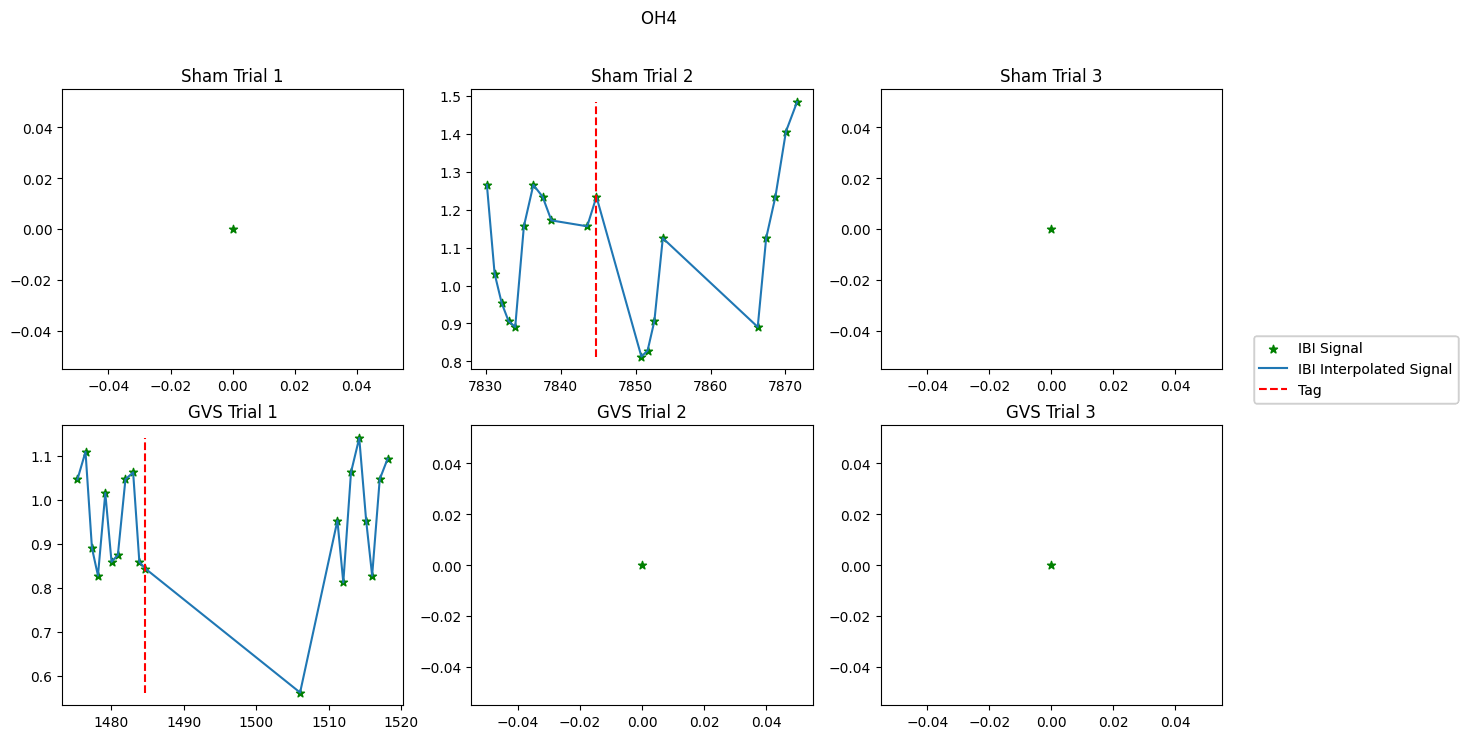

In [ ]:
loc = '/content/drive/MyDrive/DATA_untouched/OH04_April 22 2022_e4 data/'
standing_inds = [24, 29, 34, 3, 8, 13]
offsets_ = plot_windows(loc, 4, standing_inds)

<ipython-input-3-c4889f534c06>:42: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, count)


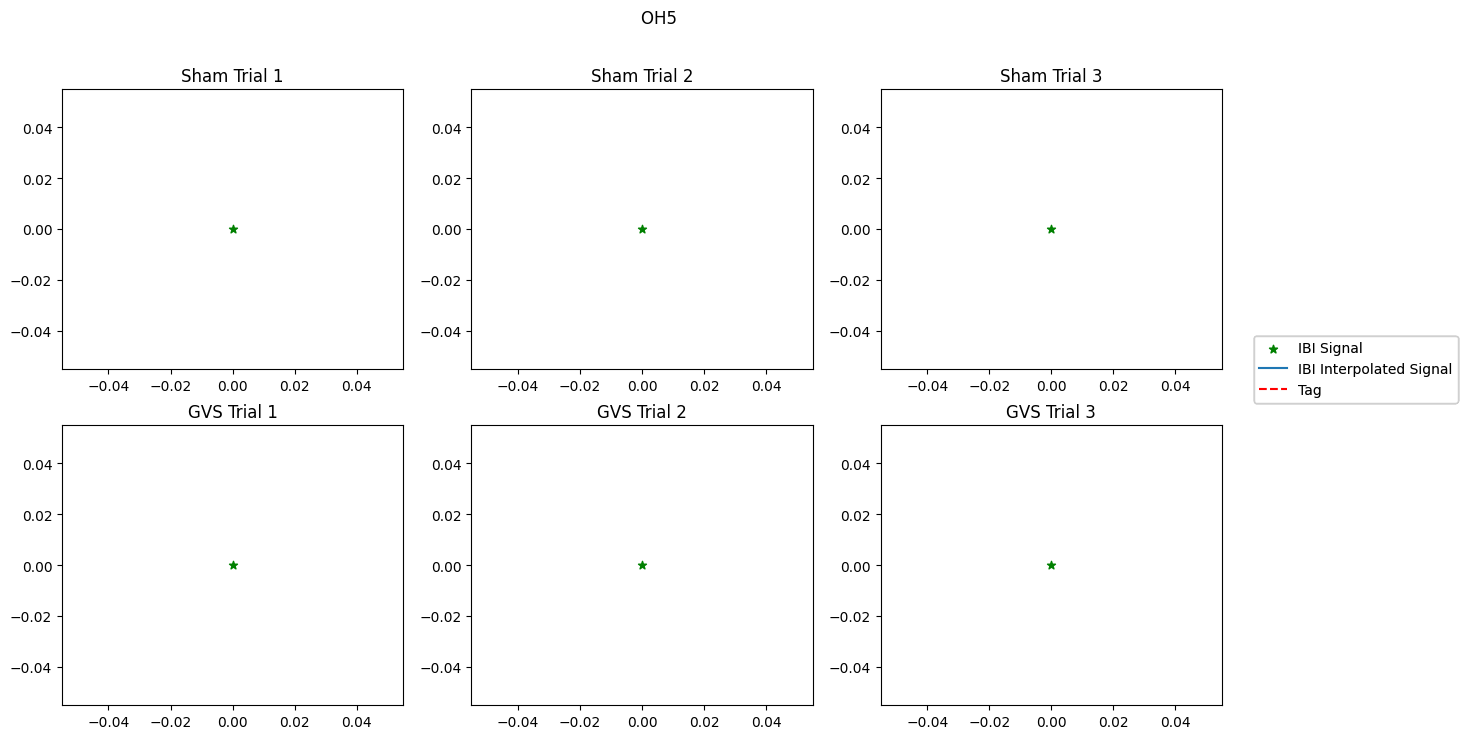

In [ ]:
loc = '/content/drive/MyDrive/DATA_untouched/OH05_April 22 2022_e4 data/'
standing_inds = [26, 30, 36, 4, 10, 17]
offsets_ = plot_windows(loc, 5, standing_inds)

<ipython-input-3-c4889f534c06>:42: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, count)


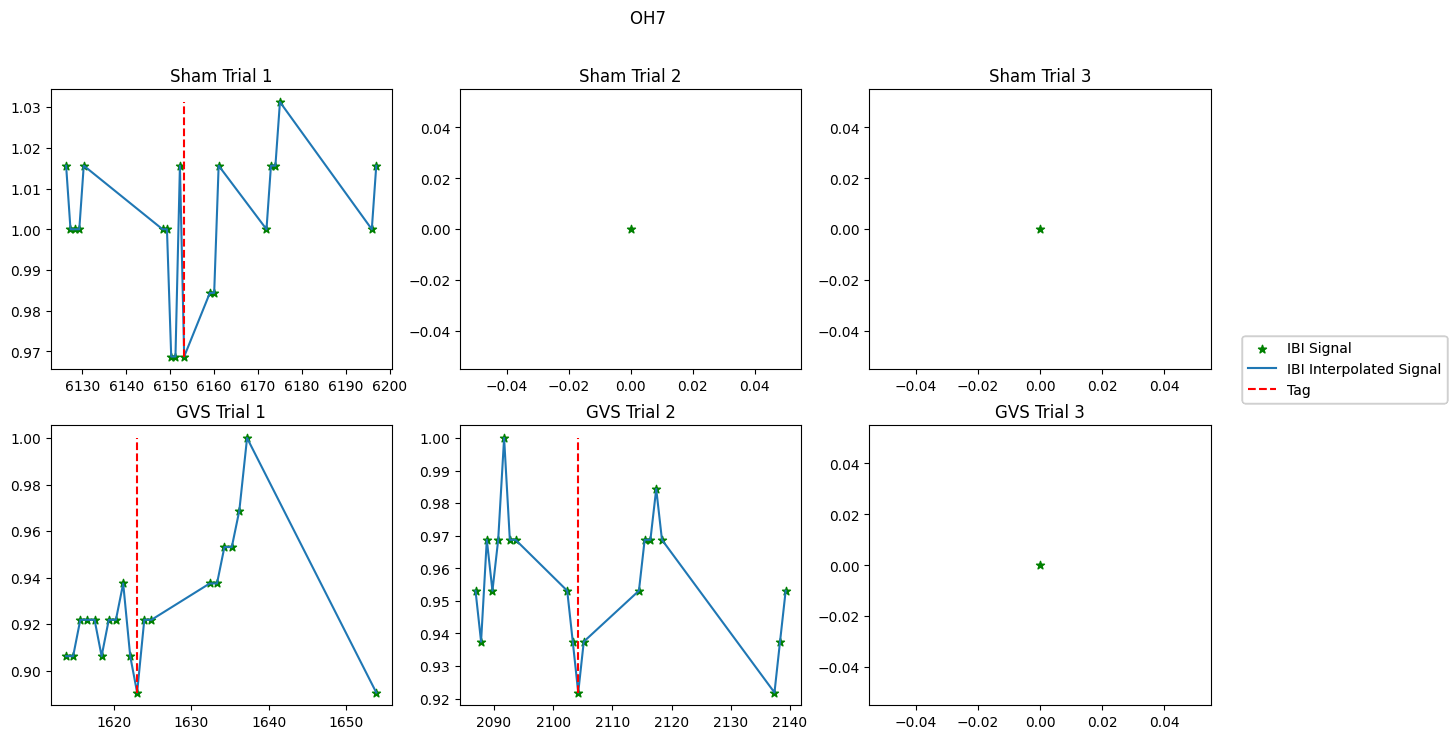

In [ ]:
loc = '/content/drive/MyDrive/DATA_untouched/OH07_May 3 2022_e4 data/'
standing_inds = [25, 30, 34, 4, 9, 14]
offsets_ = plot_windows(loc, 7, standing_inds)

<ipython-input-3-c4889f534c06>:42: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, count)


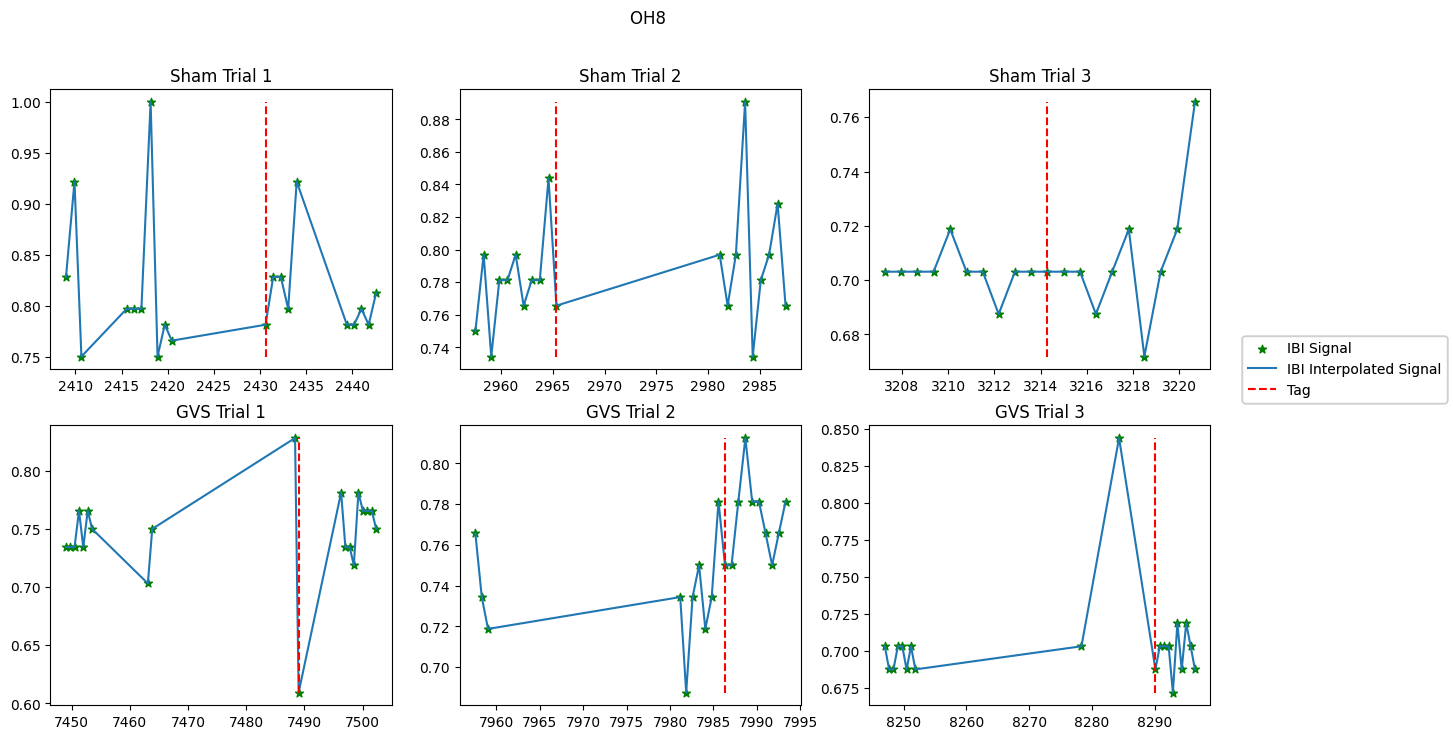

In [ ]:
loc = '/content/drive/MyDrive/DATA_untouched/OH08_May 4 2022_e4 data/'
standing_inds = [4, 9, 13, 20, 25, 30]
offsets_ = plot_windows(loc, 8, standing_inds)

<ipython-input-3-c4889f534c06>:42: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, count)


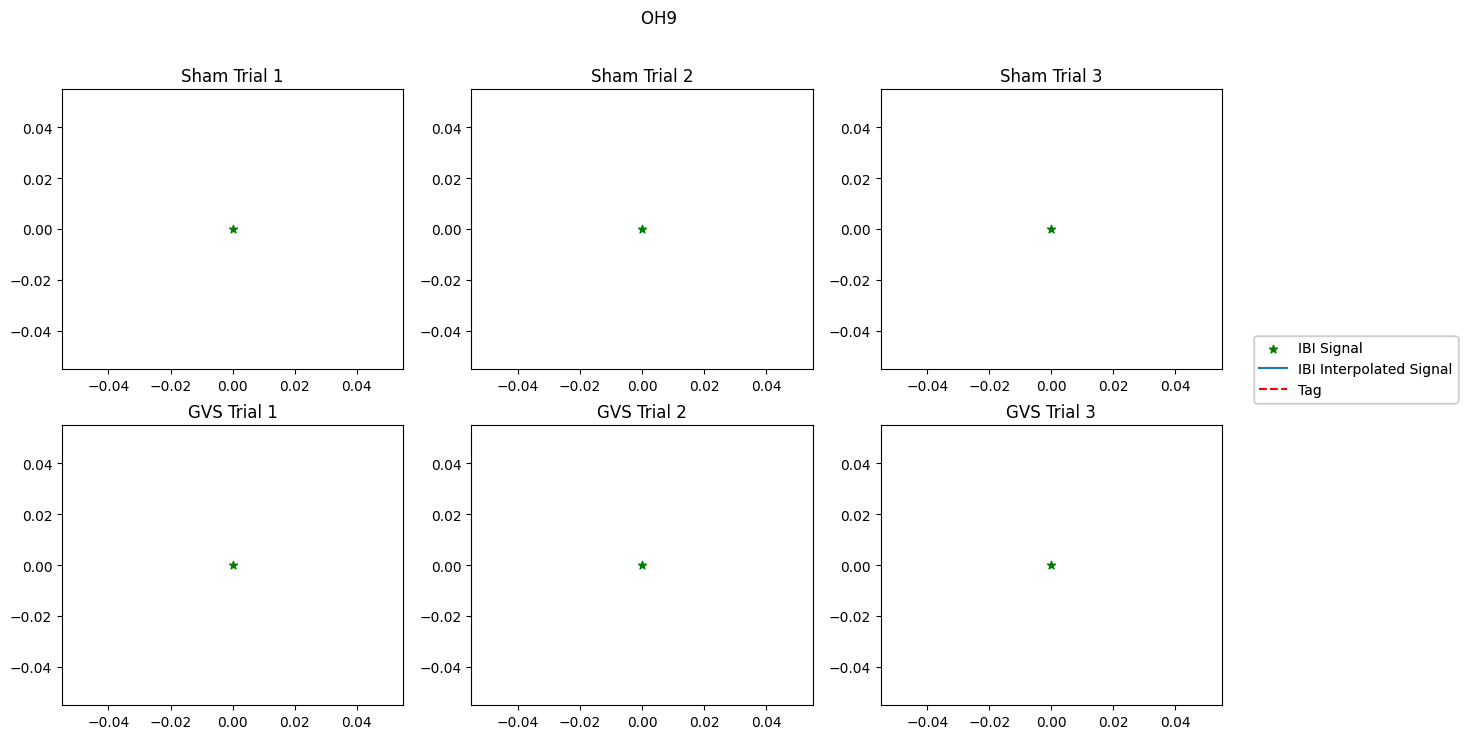

In [ ]:
loc = '/content/drive/MyDrive/DATA_untouched/OH09_May 5 2022_e4 data/'
standing_inds = [25, 30, 35, 4, 9, 14]
offsets_ = plot_windows(loc, 9, standing_inds)

<ipython-input-3-c4889f534c06>:42: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, count)


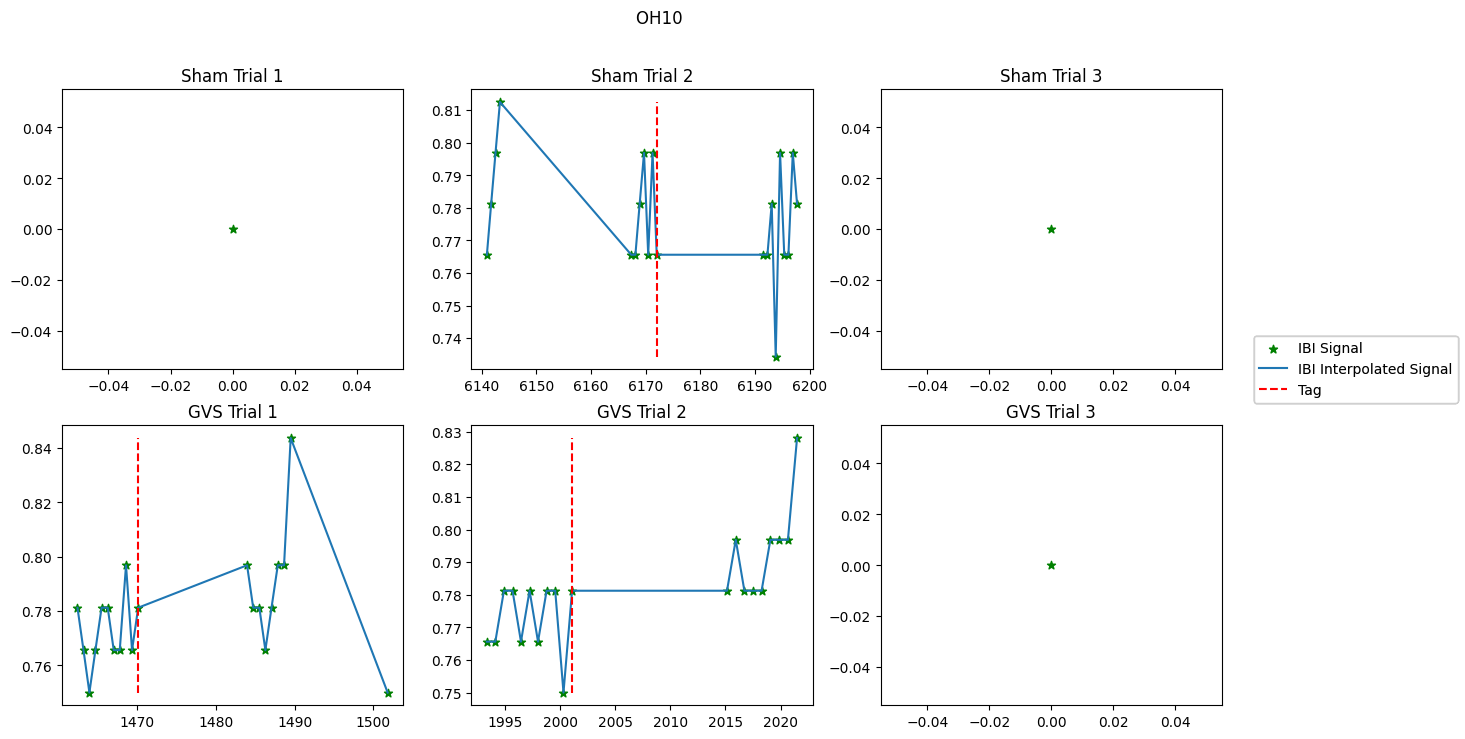

In [ ]:
loc = '/content/drive/MyDrive/DATA_untouched/OH10_May 10 2022_e4 data/'
standing_inds = [25, 29, 33, 4, 9, 14]
offsets_ = plot_windows(loc, 10, standing_inds)

In [ ]:
loc = '/content/drive/MyDrive/DATA_untouched/OH11_May 16 2022_e4 data/'
standing_inds = [4, 9, 14, 26, 31, 36]
offsets_ = plot_windows(loc, 11, standing_inds)

In [ ]:
loc = '/content/drive/MyDrive/DATA_untouched/OH12_May 17 2022_e4 data/'
standing_inds = [25, 31, 36, 4, 9, 14]
offsets_ = plot_windows(loc, 12, standing_inds)

In [ ]:
loc = '/content/drive/MyDrive/DATA_untouched/OH13_May 18 2022_e4 data/'
standing_inds = [25, 30, 35, 4, 9, 14]
offsets_ = plot_windows(loc, 13, standing_inds)

In [ ]:
loc = '/content/drive/MyDrive/DATA_untouched/OH14_May 19 2022_e4 data/'
standing_inds = [25, 30, 35, 4, 9, 14]
offsets_ = plot_windows(loc, 14, standing_inds)

In [ ]:
loc = '/content/drive/MyDrive/DATA_untouched/OH15_May 25 2022_e4 data/'
standing_inds = [4, 10, 16, 27, 32, 37]
offsets_ = plot_windows(loc, 15, standing_inds)

In [ ]:
loc = '/content/drive/MyDrive/DATA_untouched/OH16_May 27 2022_e4 data/'
standing_inds = [26, 34, 40, 4, 9, 14]
offsets_ = plot_windows(loc, 16, standing_inds)

In [ ]:
loc = '/content/drive/MyDrive/DATA_untouched/OH17_May 30 2022_e4 data/'
standing_inds = [25, 30, 35, 4, 9, 14]
offsets_ = plot_windows(loc, 17, standing_inds)

<ipython-input-3-c4889f534c06>:42: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, count)


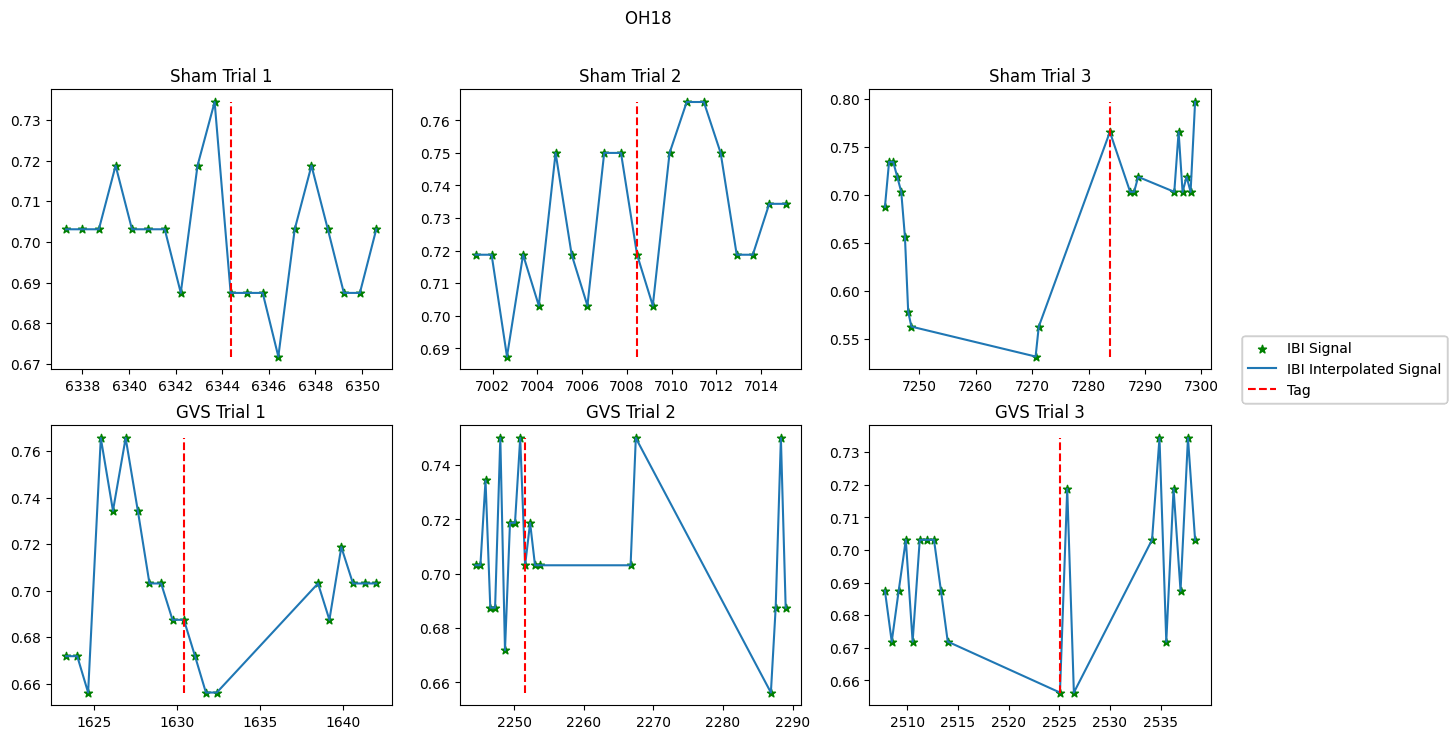

In [ ]:
loc = '/content/drive/MyDrive/DATA_untouched/OH18_June 1 2022_e4 data/'
standing_inds = [25, 30, 35, 4, 9, 14]
offsets_ = plot_windows(loc, 18, standing_inds)

<ipython-input-3-c4889f534c06>:42: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, count)


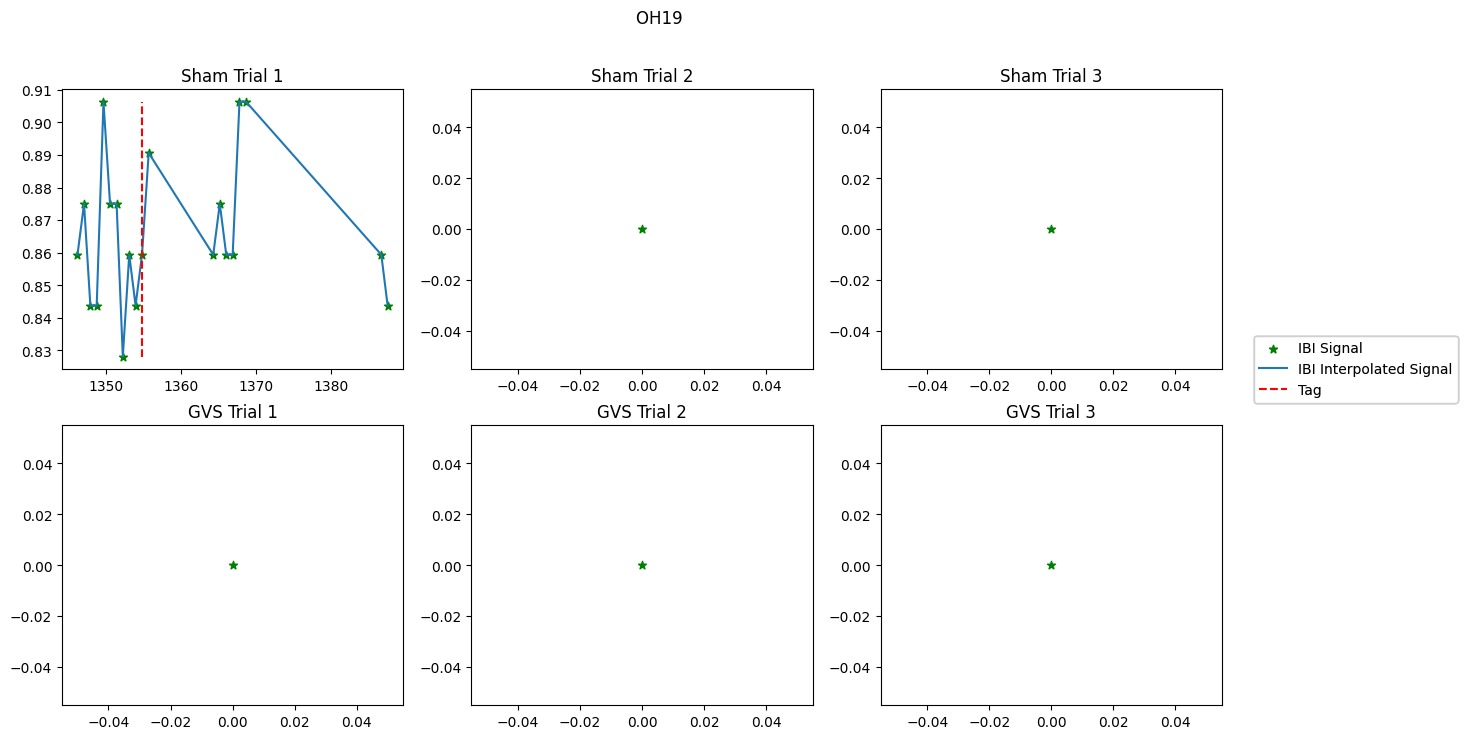

In [ ]:
loc = '/content/drive/MyDrive/DATA_untouched/OH19_June_8_2022_e4 data/'
standing_inds = [4, 9, 14, 27, 32, 37]
offsets_ = plot_windows(loc, 19, standing_inds)

<ipython-input-3-c4889f534c06>:42: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, count)


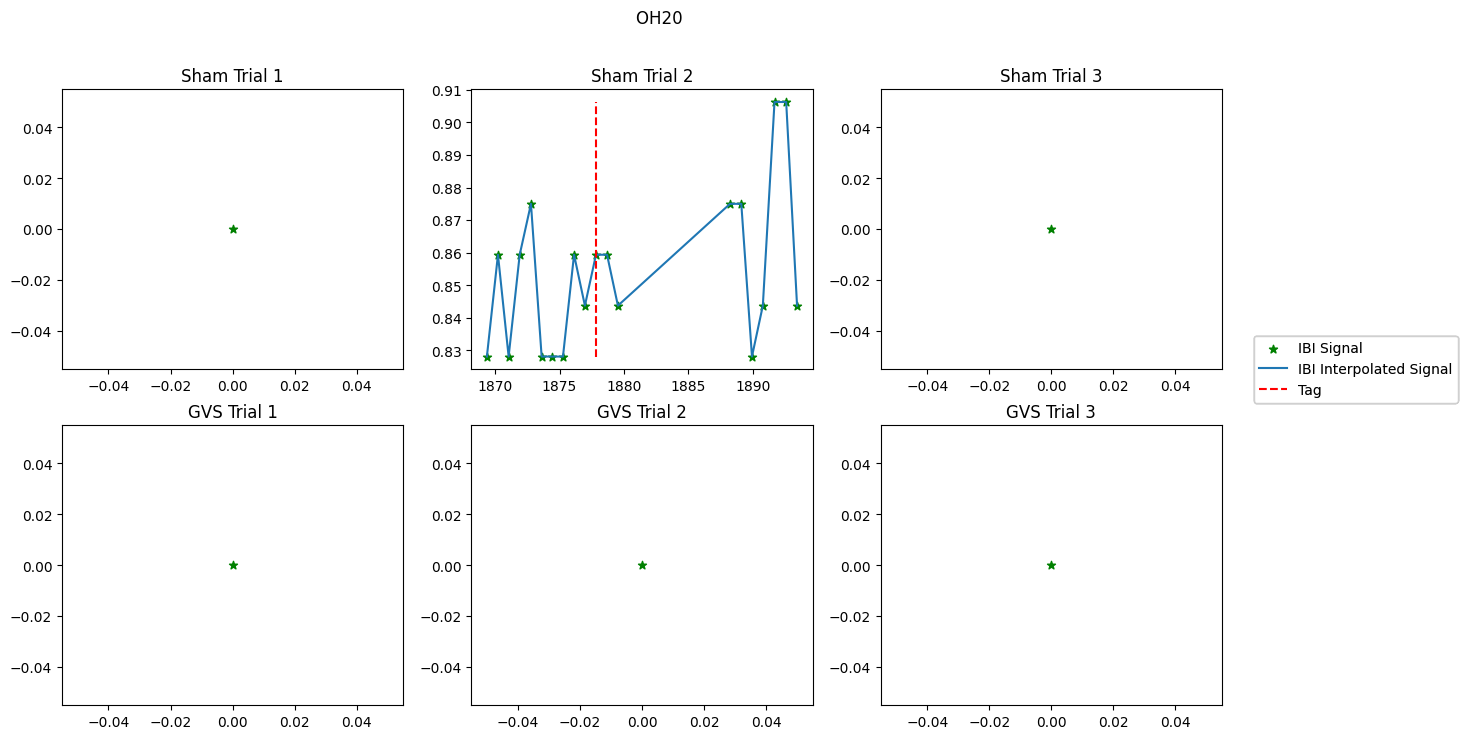

In [ ]:
loc = '/content/drive/MyDrive/DATA_untouched/OH20_June_8_2022_e4 data/'
standing_inds = [4, 9, 14, 25, 30, 35]
offsets_ = plot_windows(loc, 20, standing_inds)

In [ ]:
loc = '/content/drive/MyDrive/DATA_untouched/OH21_June_9_2022_e4 data/'
standing_inds = [25, 30, 35, 4, 9, 14]
offsets_ = plot_windows(loc, 21, standing_inds)

In [ ]:
loc = '/content/drive/MyDrive/DATA_untouched/OH22_June_10_2022_e4 data/'
standing_inds = [25, 30, 35, 4, 9, 14]
offsets_ = plot_windows(loc, 22, standing_inds)

In [ ]:
loc = '/content/drive/MyDrive/DATA_untouched/OH23_June_13_2022_e4 data/'
standing_inds = [4, 9, 14, 25, 30, 35]
offsets_ = plot_windows(loc, 23, standing_inds)

In [ ]:
loc = '/content/drive/MyDrive/DATA_untouched/OH24_June_14_2022_e4 data/'
standing_inds = [26, 31, 36, 4, 9, 14]
offsets_ = plot_windows(loc, 24, standing_inds)